# Basic Machine Learning Examples with scikit-learn

In this notebook, we'll demonstrate two fundamental machine learning algorithms:
1. K-Nearest Neighbors (KNN)
2. Linear Regression

For each algorithm, we'll show a simple example with visualization.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors, linear_model
from sklearn.model_selection import train_test_split

## 1. K-Nearest Neighbors (KNN)

We'll use the iris dataset for flower classification.

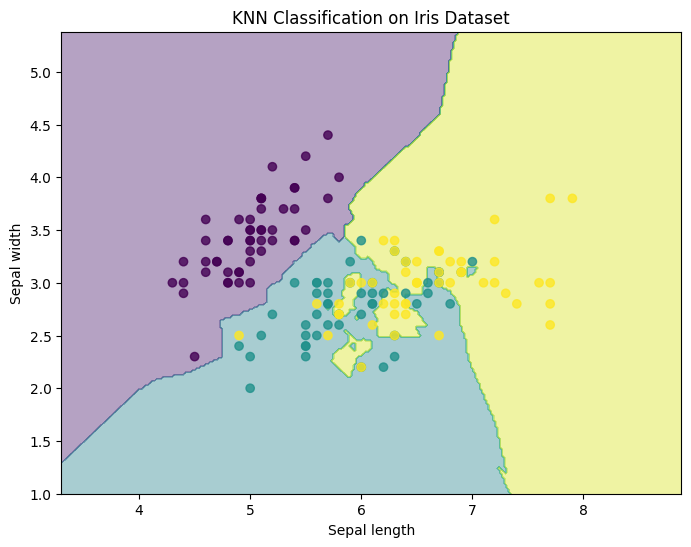

Accuracy on test set: 0.76


In [ ]:
# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, [0, 1]]  # taking only first two features for easier visualization
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train KNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Create mesh grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict classes for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize results
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("KNN Classification on Iris Dataset")
plt.show()

print(f"Accuracy on test set: {knn.score(X_test, y_test):.2f}")

## 2. Linear Regression

We'll create a simple example of linear regression using generated data.

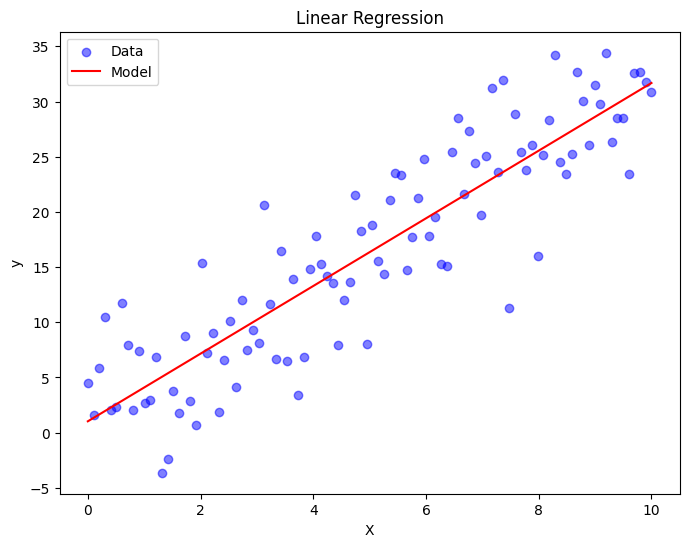

Slope: 3.06
Intercept: 1.03
R² score: 0.85


In [ ]:
# Generate sample data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X + 2 + np.random.randn(100).reshape(-1, 1) * 5  # y = 3x + 2 + noise

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data")
plt.plot(X, reg.predict(X), color="red", label="Model")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()

print(f"Slope: {reg.coef_[0][0]:.2f}")
print(f"Intercept: {reg.intercept_[0]:.2f}")